<a href="https://colab.research.google.com/github/hanyuc37/Dog_Breed_Analytics/blob/main/Dog_Breed_Analysis_Hanyu_Chen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [737]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math


In [738]:
data = pd.read_csv("/content/drive/MyDrive/Dog Breed/dog_breeds.csv")
data.head()

,Breed,Country of Origin,Fur Color,Height (in),Color of Eyes,Longevity (yrs),Character Traits,Common Health Problems
0,Labrador Retriever,Canada,"Yellow, Black, Chocolate",21-24,Brown,10-12,"Loyal, friendly, intelligent, energetic, good-...","Hip dysplasia, obesity, ear infections"
1,German Shepherd,Germany,"Black, Tan",22-26,Brown,7-10,"Loyal, intelligent, protective, confident, tra...","Hip dysplasia, elbow dysplasia, pancreatitis"
2,Bulldog,England,"White, Red",12-16,Brown,8-10,"Loyal, calm, gentle, brave","Skin allergies, respiratory issues, obesity"
3,Poodle,France,"White, Black, Brown, Apricot",10-15,"Brown, Blue",12-15,"Intelligent, active, affectionate, hypoallergenic","Hip dysplasia, epilepsy, bladder stones"
4,Beagle,England,"White, Tan, Red, Lemon",13-15,Brown,12-15,"Curious, friendly, energetic, good-natured","Ear infections, hip dysplasia, epilepsy"


# **Data Preprocessing**


In [739]:
# Check missing value
data.isna().sum()

Breed                     0
Country of Origin         0
Fur Color                 0
Height (in)               0
Color of Eyes             0
Longevity (yrs)           0
Character Traits          0
Common Health Problems    0
dtype: int64

In [740]:
# Check duplicate value
data.duplicated().sum()

0

In [741]:
# Country of Origin
print(data['Country of Origin'].unique())
data.loc[data['Country of Origin']=='Tibet']
data['Country of Origin'].replace('Tibet','China',inplace = True)

['Canada' 'Germany' 'England' 'France' 'Mexico' 'Scotland' 'China'
 'Russia' 'Australia' 'Switzerland' 'Ireland' 'Belgium' 'Rhodesia'
 'United States' 'Madagascar' 'Italy' 'Wales' 'Middle East' 'Finland'
 'Japan' 'Netherlands' 'Hungary' 'Tibet' 'Malta' 'Turkey' 'Africa' 'Congo']


In [742]:
# Encode charater traits
# Change all the elements in lowercase to avoid duplicate
data['Character Traits'] = data['Character Traits'].str.lower()
character = [] 
# put all the charater for each breed into list separated by ','
for i in data['Character Traits']:
  i = i.split(",")
  for j in range(len(i)):
    i[j] = i [j].strip()
  character.append(i)

# Get the column names (unique value of the list)
character_cate = set() 
for i in character:
  for j in i:
    j = j.strip() # remove space to avoid duplicates
    character_cate.add(j)
print(character_cate) 

# update the `Character Traits` column
data['Character Traits'] = character
# unlist each
data['Character Traits'] = data['Character Traits'].apply(lambda x: ','.join(dict.fromkeys(x).keys()))
# Create new columns
for value in character_cate:
  data[value] = data['Character Traits'].apply(lambda x: 1 if value in x else 0)

{'kind', 'calm', 'gentle', 'protective', 'energetic', 'friendly', 'good-natured', 'athletic', 'active', 'strong', 'sensitive', 'loyal', 'trainable', 'playful', 'independent', 'curious', 'confident', 'affectionate', 'brave', 'social', 'hypoallergenic', 'intelligent', 'patient', 'charming'}


In [743]:
# Encode the `Common Health Problems`
data['Common Health Problems'] = data['Common Health Problems'].str.lower()
health_problem = []
for i in data['Common Health Problems']:
  health_problem.append(i.split(','))

for j in health_problem:
  for k in range(len(j)):
    j[k] = j[k].strip()# remove the space before and behind the word
    if j[k] == 'eye issues':# The eye issues are the same as eye problems
      j[k] = 'eye problems'
health_problem
# update the `Common Health Problems`
data['Common Health Problems'] = health_problem 
data['Common Health Problems'] = data['Common Health Problems'].apply(lambda x: ','.join(dict.fromkeys(x).keys()))
# Get the column names
health_prob_cate = set()
for i in health_problem:
  for j in i:
    health_prob_cate.add(j)
# Encode the new columns
for value in health_prob_cate:
  data[value] = data['Common Health Problems'].apply(lambda x: 1 if value in x else 0)

In [744]:
# Country of Origin
from sklearn.preprocessing import OrdinalEncoder
ord = OrdinalEncoder()
data['Country_encode'] = ord.fit_transform(data[['Country of Origin']])
data['Country_encode']

0       3.0
1       9.0
2       6.0
3       8.0
4       6.0
       ... 
112    24.0
113     6.0
114    13.0
115     2.0
116    15.0
Name: Country_encode, Length: 117, dtype: float64

# **EDA**

`Character traits` of dogs:
Top 10 characteristics that dogs have. 









         character  occurance  percentage
0            loyal        116    0.991453
2      intelligent        116    0.991453
3        energetic        116    0.991453
4     good-natured        116    0.991453
16         playful        114    0.974359
9           gentle         65    0.555556
12    affectionate         46    0.393162
13  hypoallergenic         41    0.350427
11          active         41    0.350427
21     independent         38    0.324786


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

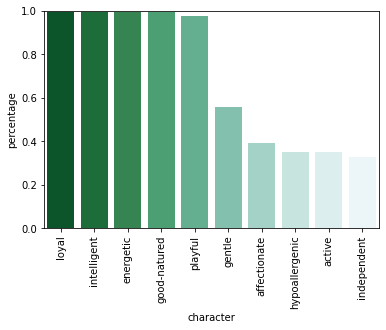

In [745]:
occurance ={}
count = 0

for i in character:
  for j in i:
    occurance[j] = count
  count+=1
occurance

character_df = pd.DataFrame.from_dict(occurance,orient ='index')
character_df.reset_index(inplace = True)
character_df.columns =['character','occurance']
 # Add percentage
character_df['percentage'] = character_df['occurance']/len(data)
# Top 10 most common characters that dogs have
character_df = character_df.sort_values('percentage',ascending = False)
print(character_df[:10])
# visualization
sns.barplot(x = 'character', y = 'percentage', data = character_df[:10],
            palette = 'BuGn_r')
plt.ylim(0.0,1, 0.1)
plt.xticks(rotation = 90)

99% breeds of dogs are loyal, intelligent,energetic, good-natured.

Contry distribution

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

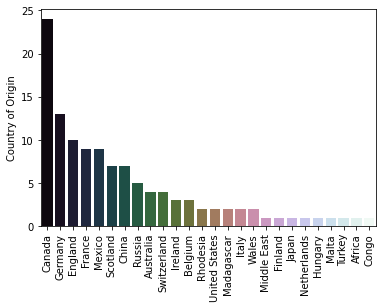

In [826]:
sns.barplot(x = data['Country of Origin'].unique(), 
            y = data['Country of Origin'].value_counts(),
            palette = 'cubehelix')
plt.xticks(rotation = 90)

Both `Longevity` and `height` are the range of number. Averges are used in the analysis.

In [746]:
# Calculate the average longevity of each breed

# Change the column names
data = data.rename(columns = {'Longevity (yrs)':'longevity'})
data= data.rename(columns = {'Height (in)':'Height'})
longevity = []
height = []
for i in data['longevity']:
  longevity.append(i.split('-'))
avg_longevity =[]
for i in range(len(longevity)):
  avg_longevity.append((int(longevity[i][0])+(int(longevity[i][1]))/2))
data['avg_longevity'] = avg_longevity
# Calculate the average height for each breed
for i in data['Height']:
  height.append(i.split('-'))
avg_height =[]
for i in range(len(height)):
  avg_height.append((int(height[i][0])+(int(height[i][1]))/2))
data['avg_height'] = avg_height

The top 10 most common health problems that dogs get

In [827]:
occurance ={}
count = 0

for i in health_problem:
  for j in i:
    occurance[j] = count
  count+=1

health_prob_df = pd.DataFrame.from_dict(occurance,orient ='index')
health_prob_df.reset_index(inplace = True)
health_prob_df.columns =['problem','occurance']
print("the total number of health problem is: " + str(len(health_prob_df)))
health_prob_df.sort_values('occurance',ascending = False).head(5)

the total number of health problem is: 17


,problem,occurance
9,dental problems,116
10,eye problems,116
5,skin allergies,116
0,hip dysplasia,64
6,respiratory issues,55


In [748]:
# get the percentage
len(data)
# 117 breed dogs
health_prob_df['percentage'] = health_prob_df['occurance']/len(data)
health_prob_df = health_prob_df.sort_values('percentage',ascending =False)

There are total of 22 health problems that dogs have. Among 117 dog breeds, 99.1% dog breeds have highly risk to get dental problems, eye problems, and skin allergies.

               problem  occurance  percentage
9      dental problems        116    0.991453
10        eye problems        116    0.991453
5       skin allergies        116    0.991453
0        hip dysplasia         64    0.547009
6   respiratory issues         55    0.470085
15            diabetes         48    0.410256
4         pancreatitis         48    0.410256
8       bladder stones         41    0.350427
7             epilepsy         41    0.350427
11              cancer         36    0.307692


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

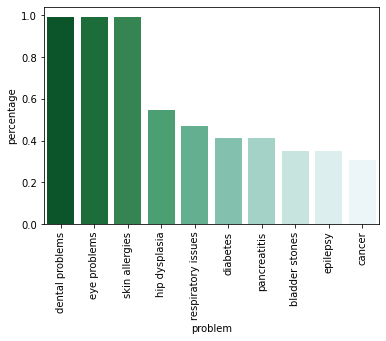

In [749]:
# Top 10 health problems
print(health_prob_df[:10])
ax = sns.barplot(x ='problem', y ='percentage', data = health_prob_df[:10], 
            order = health_prob_df[:10].sort_values('percentage',ascending =False).problem,
            palette = 'BuGn_r')
plt.xticks(rotation =90)

Basic information:
1. Average dog ages
1. Top 5 breeds that have longer lifespans
2. Top 5 breeds that have less health issues

Siberian Husky has the shortest lifespans compared to all other breeds, which is 10 years old.
Saint Bernard has longest lifespan compared to all other breeds, which is 22 years old.
the average dog lifespan is 18 years old.


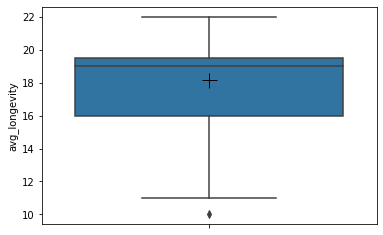

,Breed,avg_longevity
108,Yorkshire Terrier,19.5
107,Xoloitzcuintli,19.5
106,Wirehaired Pointing Griffon,19.0
105,Whippet,19.5
49,West Highland White Terrier,20.0


In [750]:
data['avg_longevity']
sub_lifespan = data[['Breed','avg_longevity']]
# 1. information about lifespan.
print(str(sub_lifespan.Breed[sub_lifespan['avg_longevity'].min()]) + 
      str(' has the shortest lifespans compared to all other breeds, which is ')+
      str(int(sub_lifespan['avg_longevity'].min())) +
      " years old.")

print(str(sub_lifespan.Breed[sub_lifespan['avg_longevity'].max()]) +
      " has longest lifespan compared to all other breeds, which is "+ 
      str(int(sub_lifespan['avg_longevity'].max())) +
      ' years old.')

print(str("the average dog lifespan is ") + 
      str(int(sub_lifespan['avg_longevity'].mean())) + 
      str(' years old.'))

# Look at the boxplot: 
sns.boxplot(y = 'avg_longevity', data = sub_lifespan,
             showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "15"})
plt.show()

# # 1. Top 5 breeds that has longer lifespans 
sub_lifespan = sub_lifespan.sort_values('Breed',ascending = False)
sub_lifespan_top = sub_lifespan[:5]
sub_lifespan_top


**Linear Regression Analysis--> Target: Longevity**

In [751]:
# Re-define data 
df = data.loc[:, data.columns.difference (['longevity','Breed','Country of Origin','Fur Color','Height','Color of Eyes','Character Traits','Common Health Problems'])]

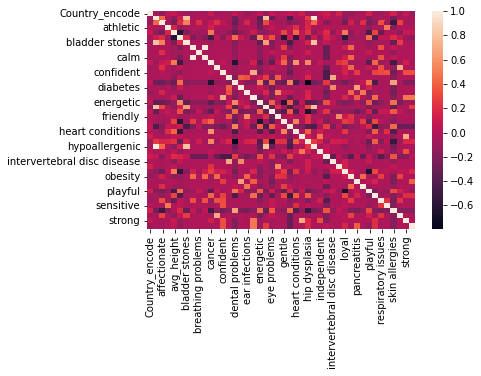

In [752]:
df_corr = df.corr()
sns.heatmap(df_corr)

In [762]:
# Top 5 highest correlations 
df_corr
def get_redundant_pairs(df):
  pairs_to_drop = set()
  cols = df.columns
  for i in range(0, df.shape[1]):
    for j in range(0,i+1):
      pairs_to_drop.add((cols[i],cols[j]))
  return pairs_to_drop

def get_top_abs_correlations(df, n=10):
  abs_corr = df.corr().abs().unstack()
  labels_to_drop = get_redundant_pairs(df)
  abs_corr = abs_corr.drop(labels = labels_to_drop).sort_values(ascending = False)
  return abs_corr[0:n]

get_redundant_pairs(df_corr)
get_top_abs_correlations(df, n=10)

active               hypoallergenic                 1.000000
brave                calm                           1.000000
active               bladder stones                 0.809239
bladder stones       hypoallergenic                 0.809239
epilepsy             hypoallergenic                 0.809239
active               epilepsy                       0.809239
dental problems      hip dysplasia                  0.791218
curious              intervertebral disc disease    0.704052
hereditary myopathy  strong                         0.704052
charming             social                         0.704052
dtype: float64

In [765]:
df_corr['dental problems']['hip dysplasia']

-0.7912175268062703

Checking the sign for the top 10 highest correlations, only `dental problems` and `hip dysplasia` has a negative relationship with a coef of about -0.79, and others all have positive relationship.

Correlation between the `avg_height` and `avg_longevity`

In [757]:
df_y_corr = df.corr

array([[ 1.        , -0.59626629],
       [-0.59626629,  1.        ]])

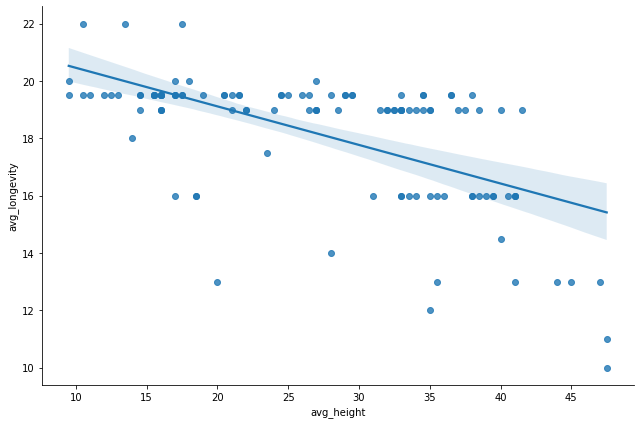

In [830]:
# Is there any corrleation between logevity and height
sns.lmplot(x="avg_height", y="avg_longevity", data = data, height=6, aspect=1.5)
# Correlation coefficient
np.corrcoef(data['avg_height'], data['avg_longevity'])
#-0.59626629

There is a negative relationship between the dog average height and the dog average longevity. The correlation coefficent is -0.59626629, which means with the increase in dog height, it is expected to have a shorter lifespan. However, the relationship between the two variables are not strong.